In [0]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings("ignore")

In [73]:
arima_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Ohio_beach_nm.csv')
arima_df['Measurement.Timestamp'] = pd.to_datetime(arima_df['Measurement.Timestamp'])
arima_df.tail(3)

,Measurement.Timestamp,Water.Temperature,Turbidity,Wave.Height,Wave.Period,Battery.Life,index
13880,2019-09-11 09:00:00,18.8,1.04,0.118,3,10.2,13881
13881,2019-09-11 10:00:00,18.9,1.22,0.092,4,10.2,13882
13882,2019-09-11 11:00:00,23.8,0.00,0.028,10,10.2,13883


In [0]:
arima_df = arima_df.set_index(['Measurement.Timestamp'], drop=True)

In [0]:
water_temp = arima_df[['Water.Temperature']]
wave_Height = arima_df[['Wave.Height']]

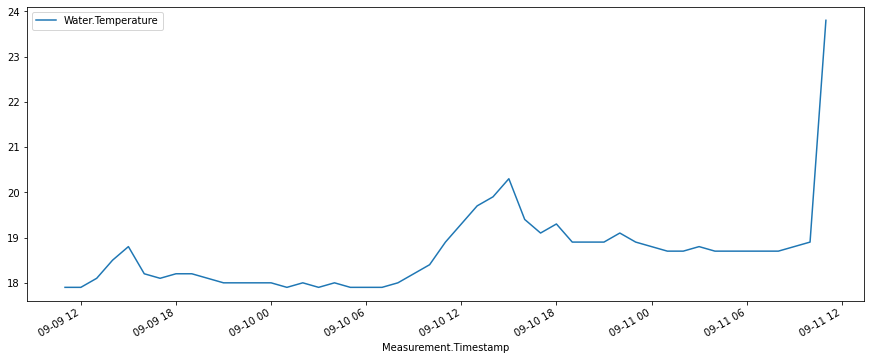

In [65]:
water_temp.tail(48).plot(figsize=(15, 6))
plt.show()

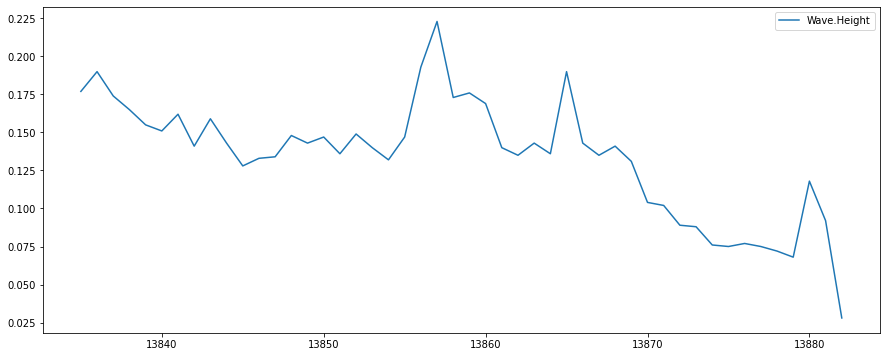

In [67]:
wave_Height.tail(48).plot(figsize=(15, 6))
plt.show()

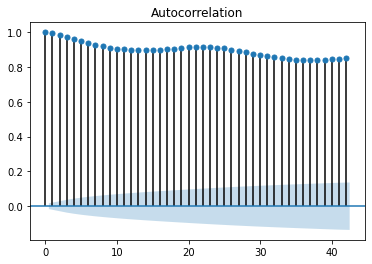

In [17]:
plot_acf(water_temp)
plt.show()

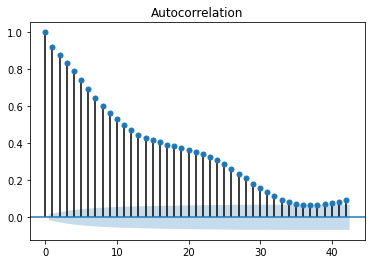

In [19]:
plot_acf(wave_Height)
plt.show()

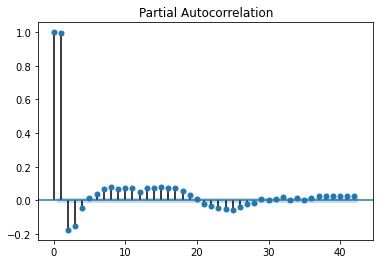

In [21]:
plot_pacf(water_temp)
plt.show()

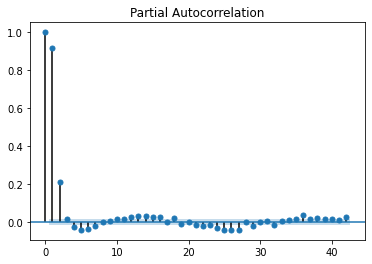

In [23]:
plot_pacf(wave_Height)
plt.show()

In [0]:
train_data = water_temp[:len(water_temp)-48]
test_data = water_temp[len(water_temp)-48:]
arima_model = SARIMAX(water_temp['Water.Temperature'], order = (1,0,1), seasonal_order = (1,0,1,24), initialization='approximate_diffuse')
arima_result = arima_model.fit()

In [0]:
arima_pred = arima_result.predict(start = len(train_data), end = len(water_temp)-1, typ="levels").rename("ARIMA Predictions")

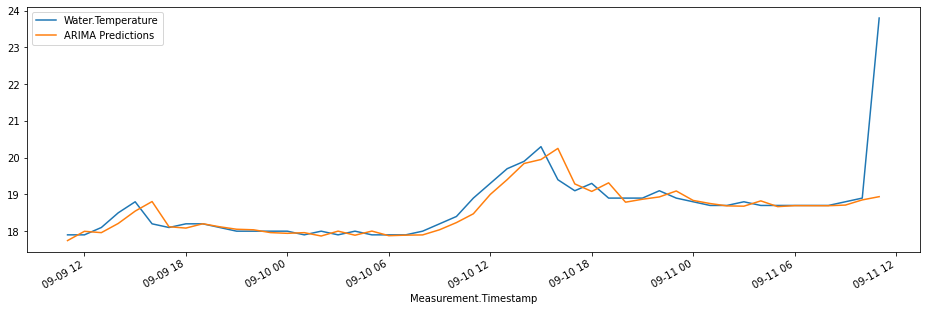

In [34]:
test_data['Water.Temperature'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [0]:
train_data = wave_Height[:len(wave_Height)-48]
test_data = wave_Height[len(wave_Height)-48:]
arima_model = SARIMAX(wave_Height['Wave.Height'], order = (1,0,1), seasonal_order = (1,0,1,24), initialization='approximate_diffuse')
arima_result = arima_model.fit()

In [0]:
arima_pred = arima_result.predict(start = len(train_data), end = len(wave_Height)-1, typ="levels").rename("ARIMA Predictions")

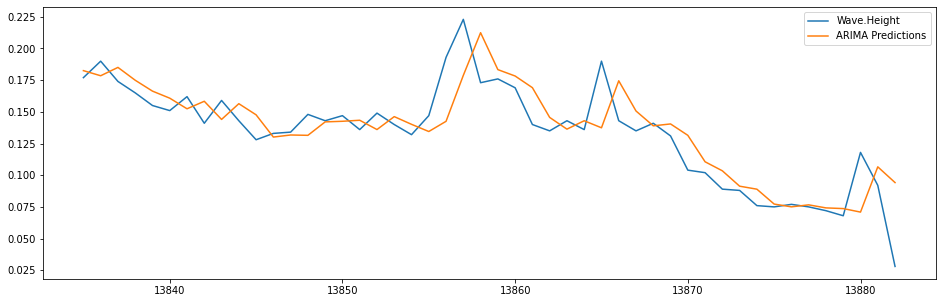

In [52]:
test_data['Wave.Height'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);